# Experiment 1

## Problem Statement:
To explore the basic features of Tensorflow and Keras packages.

## Code

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

# Basic Tensor Operations
x = tf.constant([[1., 2., 3.], [4., 5., 6.]])
print(x)
print("Shape:", x.shape)  # Size of the tensor along each of its axes
print("DType:", x.dtype)  # Type of all the elements in the tensor
print(x + x)  # Element-wise addition
print(5 * x)  # Scalar multiplication

# Concatenation and Mathematical Operations
print(tf.concat([x, x, x], axis=0))  # Concatenate tensors along the first axis
print(tf.nn.softmax(x, axis=-1))  # Convert to probability distribution
print("Sum:", tf.reduce_sum(x))  # Sum of elements

# Element-wise and Matrix Operations
a = tf.constant([[1, 2], [3, 4]])
b = tf.constant([[1, 1], [1, 1]])
print("Addition:\n", tf.add(a, b))
print("Element-wise Multiplication:\n", tf.multiply(a, b))
print("Matrix Multiplication:\n", tf.matmul(a, b))

# Advanced Operations
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])
print("Max Value:", tf.reduce_max(c))
print("Argmax:", tf.math.argmax(c))  # Index of maximum value
print("Softmax:\n", tf.nn.softmax(c))

# Working with tf.Variable
var = tf.Variable([0.0, 0.0, 0.0])
var.assign([1, 2, 3])  # Assign new values
var.assign_add([1, 1, 1])  # Increment by [1, 1, 1]

# Gradient Computation with GradientTape
x = tf.Variable(1.0)


def f(x):
    y = x**2 + 2*x - 5
    return y


with tf.GradientTape() as tape:
    y = f(x)
g_x = tape.gradient(y, x)  # dy/dx
print("Gradient dy/dx:", g_x.numpy())

# Using tf.function for Graph Execution


@tf.function
def my_func(x):
    return tf.reduce_sum(x)


print("tf.function example:", my_func(tf.constant([1, 2, 3])))

# Defining a Simple TensorFlow Module


class MyModule(tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value)

    @tf.function
    def multiply(self, x):
        return x * self.weight


mod = MyModule(3)
print("Module example:", mod.multiply(tf.constant([1, 2, 3])))

# Simple Linear Model with Keras
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
xs = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)
# Train with verbose set to 0 to suppress output
model.fit(xs, ys, epochs=1000, verbose=0)
print("Model prediction for x=10.0:", model.predict([10.0])[0][0])

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
Shape: (2, 3)
DType: <dtype: 'float32'>
tf.Tensor(
[[ 2.  4.  6.]
 [ 8. 10. 12.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[ 5. 10. 15.]
 [20. 25. 30.]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]
 [4. 5. 6.]
 [1. 2. 3.]
 [4. 5. 6.]], shape=(6, 3), dtype=float32)
tf.Tensor(
[[0.09003057 0.24472848 0.6652409 ]
 [0.09003057 0.24472848 0.6652409 ]], shape=(2, 3), dtype=float32)
Sum: tf.Tensor(21.0, shape=(), dtype=float32)
Addition:
 tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32)
Element-wise Multiplication:
 tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Matrix Multiplication:
 tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32)
Max Value: tf.Tensor(10.0, shape=(), dtype=float32)
Argmax: tf.Tensor([1 0], shape=(2,), dtype=int64)
Softmax:
 tf.Tensor(
[[2.6894143e-01 7.3105854e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)
Gradient dy/dx: 4.0
tf.function e

c:\Users\mainp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Unrecognized data type: x=[10.0] (of type <class 'list'>)

In [ ]:
# Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

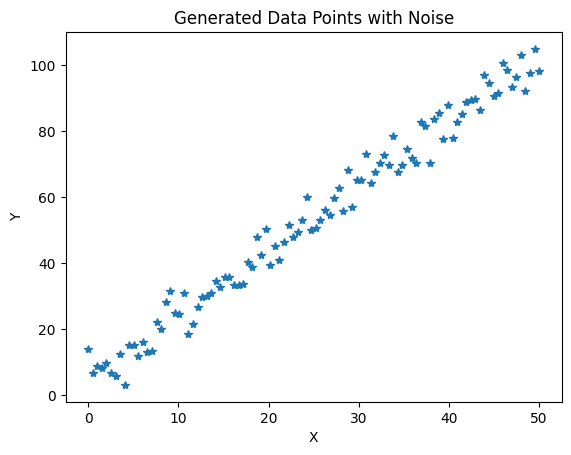

In [ ]:
# Data Generation
## Parameters for the line equation
m = 2  # Slope
b = 3  # Intercept
x = np.linspace(0, 50, 100)  # 100 linearly spaced numbers between 0 and 50

## Adding noise to the data
np.random.seed(101)  # Ensuring reproducibility
noise = np.random.normal(loc=0.0, scale=4.0, size=len(x))
y = m * x + b + noise

## Plotting the generated data
plt.plot(x, y, '*')
plt.title('Generated Data Points with Noise')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



In [ ]:

# Model summary
model.summary()

# Training the Model
# NOTE: Skipping train-test split for simplicity
model.fit(x, y, epochs=500, verbose=1)


# Neural Network Model
# Building the model
model = Sequential([
    # Input layer with 4 neurons, expects 1 feature
    Dense(4, input_dim=1, activation='relu'),
    Dense(4, activation='relu'),  # Hidden layer with 4 neurons
    Dense(1, activation='linear')  # Output layer, predicts a single value of y
])

# Compiling the model
model.compile(loss='mse', optimizer='adam')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 4)                 8         
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 1)                 5         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/500
4/4 [==============================] - 1s 6ms/step - loss: 5204.6392
Epoch 2/500
4/4 [==============================] - 0s 5ms/step - loss: 5126.4692
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 5055.4268
Epoch 4/500
4/4 [======================

In [ ]:
# Making Predictions
## Generating new points for prediction
x_for_predictions = np.linspace(0, 50, 1000)  # More dense range for a smoother line

## Predicting y values for the new x points
y_predicted = model.predict(x_for_predictions)

32/32 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Mean Squared Error: 3688.632685562116
Mean Absolute Error: 53.47009145537084


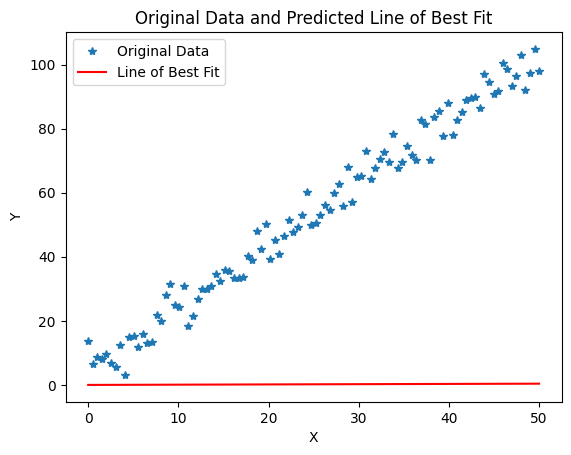

In [ ]:
# Evaluating the Model
## Making predictions on the original x values for error calculation
prediction_for_true_y = model.predict(x)

## Calculating and printing error metrics
mse = mean_squared_error(y, prediction_for_true_y)
mae = mean_absolute_error(y, prediction_for_true_y)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

## Plotting original data and the line of best fit
plt.plot(x, y, '*', label='Original Data')
plt.plot(x_for_predictions, y_predicted, 'r', label='Line of Best Fit')
plt.title('Original Data and Predicted Line of Best Fit')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


00-----==

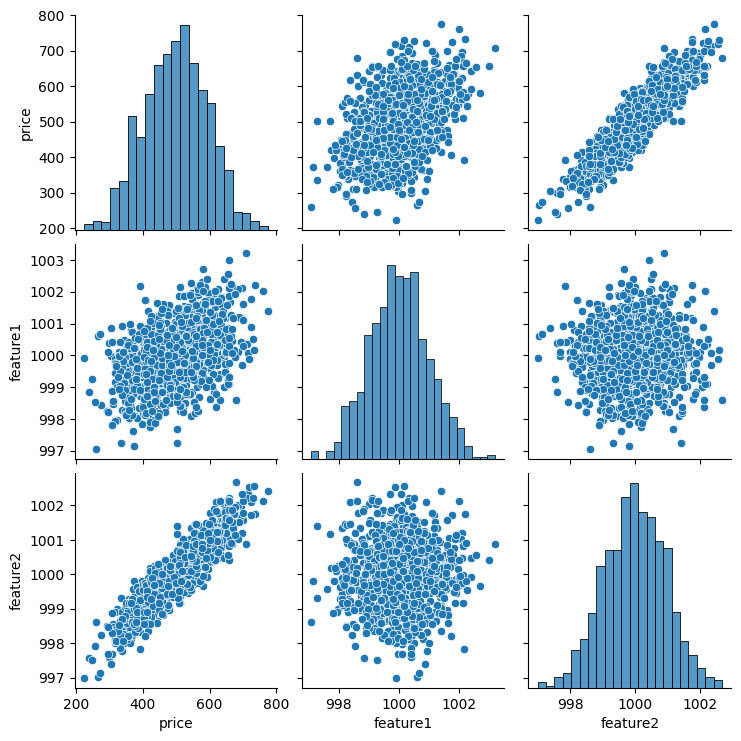

In [ ]:
# Load the Data
df = pd.read_csv('fake_reg.csv')

# Data Exploration
sns.pairplot(df)
plt.show()

# Test/Train Split
X = df[['feature1', 'feature2']].values
y = df['price'].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Normalizing/Scaling the Data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model Evaluation
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Training Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

# Plot Training Loss
loss = model.history.history['loss']
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Training Loss per Epoch")
plt.show()

# Predictions
predictions = model.predict(X_test).flatten()
pred_df = pd.DataFrame({'Test Y': y_test, 'Model Predictions': predictions})
sns.scatterplot(x='Test Y', y='Model Predictions', data=pred_df)
plt.show()

# Error Distribution
pred_df['Error'] = pred_df['Test Y'] - pred_df['Model Predictions']
sns.displot(pred_df['Error'], bins=50)
plt.show()

# Metrics
mae = mean_absolute_error(pred_df['Test Y'], pred_df['Model Predictions'])
mse = mean_squared_error(pred_df['Test Y'], pred_df['Model Predictions'])
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")



NameError: name 'model' is not defined

In [ ]:
# Model Creation
model = Sequential([
    Dense(units=4, input_shape=[2], activation='relu'),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)
])

# Compile the Model
model.compile(optimizer='rmsprop', loss='mse')

# Model Summary
model.summary()

# Training the Model
model.fit(X_train, y_train, epochs=250, verbose=0)  # Verbose=0 to not show the output


In [ ]:
# Predicting on New Data
new_gem = [[998, 1000]]
new_gem_scaled = scaler.transform(new_gem)
price_prediction = model.predict(new_gem_scaled)
print(f"Predicted Price: {price_prediction.flatten()[0]}")


In [ ]:
# Saving and Loading the Model
model.save('my_gem_model.h5')
loaded_model = load_model('my_gem_model.h5')
loaded_model_prediction = loaded_model.predict(new_gem_scaled)
print(f"Loaded Model Prediction: {loaded_model_prediction.flatten()[0]}")
